In [34]:
from skimage import color
from skimage.segmentation import slic, mark_boundaries, find_boundaries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
import cv2

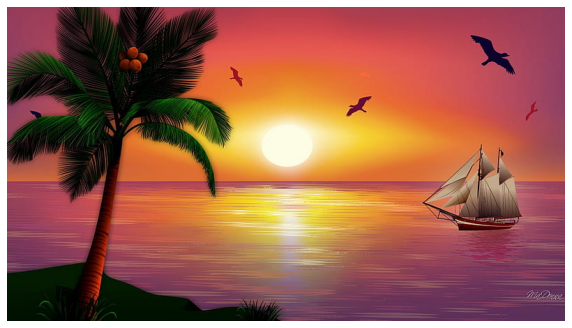

In [35]:
image = cv2.imread('boat_birds.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 20))
plt.axis("off")
plt.imshow(image)

(-0.5, 799.5, 449.5, -0.5)

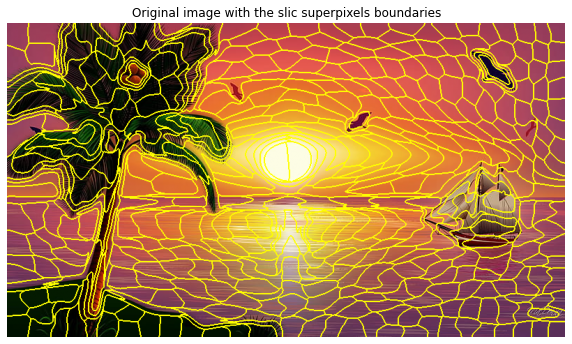

In [36]:
# define the number of segments
numSegments = 500
# apply SLIC (Simple Linear Iterative Clustering) and extract (approximately) the supplied number of segments
segments = slic(image, n_segments=numSegments, sigma=5, compactness=5,
                convert2lab=True)
# a higher value of compactness leads to squared regions, a higher value of sigma leads to rounded delimitations
plt.figure(figsize=(10, 20))
plt.imshow(mark_boundaries(image, segments))
plt.title("Original image with the slic superpixels boundaries")
plt.axis("off")
# show the plots

Text(0.5, 1.0, 'Superpixel image after slic algorithm')

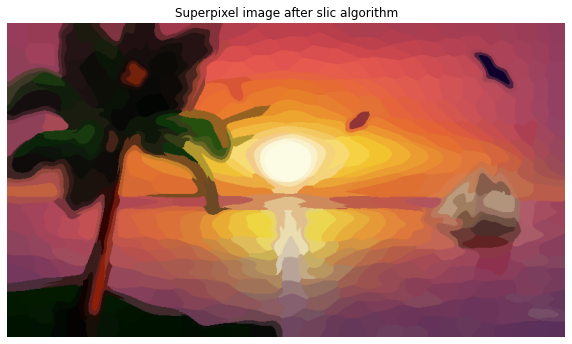

In [37]:
# Transforming the labels into superpixels, we attribute to each one the average color of the pixels composing it
superpixels = color.label2rgb(segments, image, kind='avg')
plt.figure(figsize=(10, 20))
plt.axis("off")
plt.imshow(superpixels)
plt.title("Superpixel image after slic algorithm")

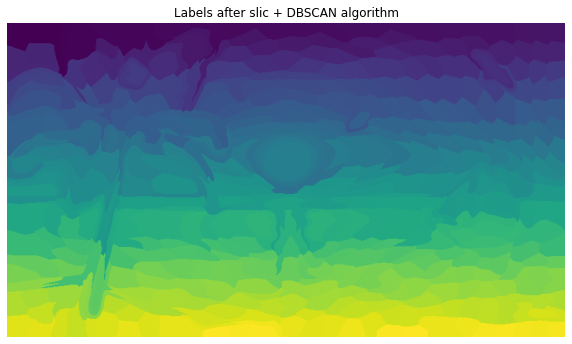

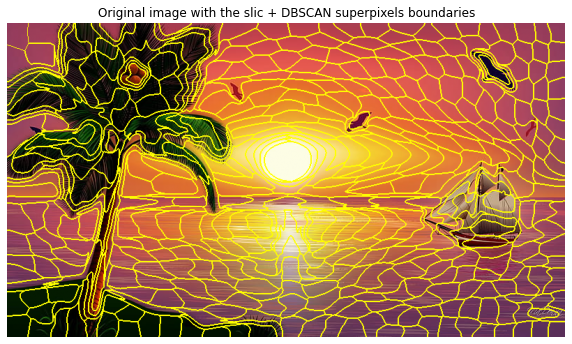

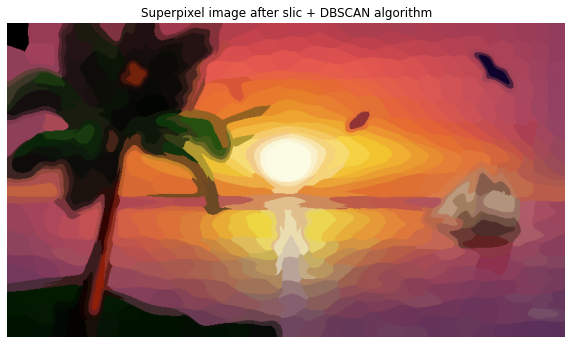

In [38]:
rows, cols, chs = superpixels.shape
feature_image = np.reshape(superpixels, [-1, chs])
db = DBSCAN(eps=0.0001pl,,, min_samples=10, metric='euclidean', algorithm='auto', n_jobs=1)
db.fit(feature_image)
labels = db.labels_

final_labels = np.reshape(labels, [rows, cols])

plt.figure(figsize=(10, 20))
plt.imshow(final_labels)
plt.axis("off")
plt.title("Labels after slic + DBSCAN algorithm")

# Transforming the labels into superpixels, we attribute to each one the average color of the pixels composing it
plt.figure(figsize=(10, 20))
plt.imshow(mark_boundaries(image, final_labels))
plt.axis("off")
plt.title("Original image with the slic + DBSCAN superpixels boundaries")

slic_dbscan = color.label2rgb(final_labels, image, kind='avg')
plt.figure(figsize=(10, 20))
plt.imshow(slic_dbscan)
plt.axis("off")
plt.title("Superpixel image after slic + DBSCAN algorithm")
plt.show()

(-0.5, 799.5, 449.5, -0.5)

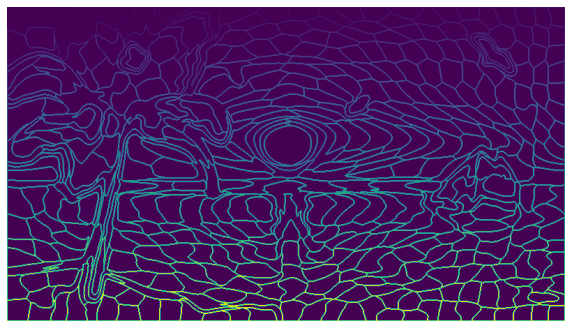

In [39]:
expanded_final_labels = np.zeros((final_labels.shape[0] + 2, final_labels.shape[1] + 2))
expanded_final_labels[1:-1, 1:-1] = (final_labels + 1)
borders = np.zeros(final_labels.shape)
borders[find_boundaries(expanded_final_labels)[1:-1, 1:-1]] = 1
borders *= (final_labels + 1)
borders = borders.astype(int)

plt.figure(figsize=(10, 20))
plt.imshow(borders[:, :])
plt.axis('off')

Doing 1
Doing 2
Doing 3
Doing 4
Doing 5
Doing 6
Doing 7
Doing 8
Doing 9
Doing 10
Doing 11
Doing 12
Doing 13
Doing 14
Doing 15
Doing 16
Doing 17
Doing 18
Doing 19
Doing 20
Doing 21
Doing 22
Doing 23
Doing 24
Doing 25
Doing 26
Doing 27
Doing 28
Doing 29
Doing 30
Doing 31
Doing 32
Doing 33
Doing 34
Doing 35
Doing 36
Doing 37
Doing 38
Doing 39
Doing 40
Doing 41
Doing 42
Doing 43
Doing 44
Doing 45
Doing 46
Doing 47
Doing 48
Doing 49
Doing 50
Doing 51
Doing 52
Doing 53
Doing 54
Doing 55
Doing 56
Doing 57
Doing 58
Doing 59
Doing 60
Doing 61
Doing 62
Doing 63
Doing 64
Doing 65
Doing 66
Doing 67
Doing 68
Doing 69
Doing 70
Doing 71
Doing 72
Doing 73
Doing 74
Doing 75
Doing 76
Doing 77
Doing 78
Doing 79
Doing 80
Doing 81
Doing 82
Doing 83
Doing 84
Doing 85
Doing 86
Doing 87
Doing 88
Doing 89
Doing 90
Doing 91
Doing 92
Doing 93
Doing 94
Doing 95
Doing 96
Doing 97
Doing 98
Doing 99
Doing 100
Doing 101
Doing 102
Doing 103
Doing 104
Doing 105
Doing 106
Doing 107
Doing 108
Doing 109
Doing 110
Doing 11

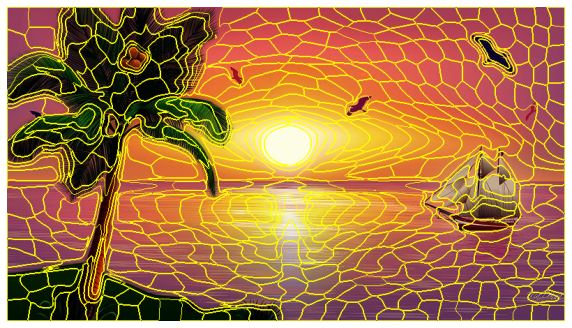

In [40]:
from random import shuffle
from time import time

FINDING_PATH_TIME_LIMIT = 10


def get_vertexes(pixels, ways):
    vertexes = []
    for _p in pixels:
        neighbours = 0
        for _delta in ways:
            _challenger = (_p[0] + _delta[0], _p[1] + _delta[1])
            if _challenger in pixels:
                neighbours += 1
        if neighbours > 2:
            vertexes.append(_p)
    return vertexes


def get_started_edge(pixels, vertexes, start_vertex, start_edge_point, ways):
    _edge = []
    _challenger = start_edge_point
    while _challenger not in vertexes and _challenger not in _edge and _challenger in pixels:
        _edge.append(_challenger)

        for _delta in ways:
            _challenger = (_edge[-1][0] + _delta[0], _edge[-1][1] + _delta[1])
            if _challenger in pixels and _challenger not in _edge and (_challenger != start_vertex or len(_edge) > 1):
                break
    _end_vertex = None if _challenger not in vertexes else _challenger
    return tuple([_end_vertex, _edge])


def get_vertex_edges(pixels, vertexes, vertex, ways):
    edges = []
    for _delta in ways:
        _challenger = (vertex[0] + _delta[0], vertex[1] + _delta[1])
        if _challenger in pixels:
            _edge = get_started_edge(pixels, vertexes, vertex, _challenger, ways)
            if _edge[0] is not None:
                edges.append(_edge)
    shuffle(edges)
    return edges


def get_best_path(vertexes_connections, pixels_amount):
    cur_path, best_path = [], []
    start_time = time()

    def _count_path_len(path):
        return sum([1 + len(_e) for _, _e in path])

    def _find_paths(cur_vertex):
        if time() - start_time > FINDING_PATH_TIME_LIMIT:
            print(f'Bad : {round(_count_path_len(best_path) / pixels_amount, 4)}')
            return
        for _target_vertex, _edge in vertexes_connections[cur_vertex]:
            _part = (_target_vertex, _edge)

            if len(cur_path) > 0 and _target_vertex == cur_path[0][0]:
                if _count_path_len(best_path) < _count_path_len(cur_path):
                    best_path.clear()
                    for _val in cur_path.copy():
                        best_path.append(_val)


                    if _count_path_len(best_path) / pixels_amount > 0.95:
                        return
                else:
                    return

            if _target_vertex not in [_v for _v, _ in cur_path] and _part not in cur_path and (
                    not _edge or (cur_vertex, _edge[::-1]) not in cur_path):
                cur_path.append(_part)
                _find_paths(_target_vertex)
                if _count_path_len(best_path) / pixels_amount > 0.95 or (time() - start_time > FINDING_PATH_TIME_LIMIT):
                    return
                cur_path.pop()

    _vertexes_copy = list(vertexes_connections.keys()).copy()
    shuffle(_vertexes_copy)
    _start = _vertexes_copy[0]
    _find_paths(_start)

    flatten_path = []
    if best_path:
        for _target_v, _edge in best_path:
            for _p in _edge:
                flatten_path.append(_p)
            flatten_path.append(_target_v)
        flatten_path.append(flatten_path[0])

    return flatten_path


def make_path(pixels):
    ways = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, 1), (1, -1), (-1, -1)]
    vertexes = get_vertexes(pixels, ways)
    if vertexes:
        vertexes_connections = {_v: get_vertex_edges(pixels, vertexes, _v, ways) for _v in vertexes}
        for _val in vertexes_connections.values():
            shuffle(_val)
        return get_best_path(vertexes_connections, len(pixels))
    else:
        start_pixel = pixels[0]
        for _delta in ways:
            _challenger = (start_pixel[0] + _delta[0], start_pixel[1] + _delta[1])
            if _challenger in pixels:
                return get_started_edge(pixels, [], start_pixel, _challenger, ways)[1]


def get_border_paths(borders_matrix):
    _border_paths = {}
    for i in np.unique(borders_matrix)[np.unique(borders_matrix) > 0]:
        print(f'Doing {i}')
        pixels_i = [tuple(j) for j in np.array(np.where(borders_matrix == i)).transpose().tolist()]
        _border_paths[i] = make_path(pixels_i)
    return _border_paths


st = time()
border_paths = get_border_paths(borders)
print('time : ', time() - st)

print([k for k in border_paths.keys() if not border_paths[k]])

draft = np.copy(image)
for k in border_paths.keys():
    for i, (row, col) in enumerate(border_paths[k]):
        draft[row, col] = np.array([255, 255, 0])
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(draft)


In [41]:
borders

array([[  1,   1,   1, ...,  27,  27,  27],
       [  1,   0,   0, ...,   0,   0,  27],
       [  1,   0,   0, ...,   0,   0,  27],
       ...,
       [432,   0,   0, ...,   0,   0, 447],
       [432,   0,   0, ...,   0,   0, 447],
       [432, 432, 432, ..., 447, 447, 447]])

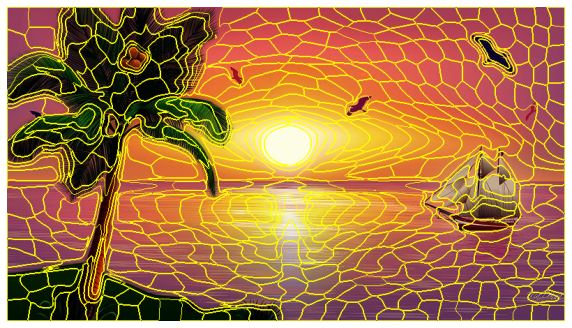

In [42]:
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(draft)

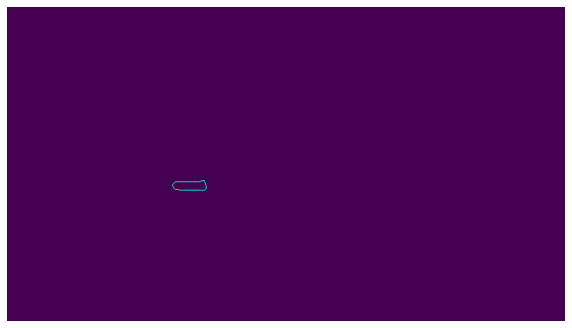

In [49]:
plt.figure(figsize=(10, 20))
plt.axis('off')
plt.imshow(borders[:, :] == 259)
